# Modelling Process

We will start with loading in the libraries, reading the data and exploring the columns

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [5]:
#reading file into dataframe
df = pd.read_csv('Prepared_Data.csv')

In [6]:
#Showing head of the dataframe 
print(df.head())
#printing the shape of the df
print(df.shape)

   PROJECT_ID Initial_completion_date final_completion_date  Delayed  \
0           7                 2020-Q4               2020-Q4        0   
1          12                 2018-Q1               2023-Q1        1   
2          39                 2018-Q2               2019-Q3        1   
3          42                 2030-Q4               2030-Q4        0   
4          83                 2016-Q2               2016-Q2        0   

   Amount_of_Delay_(Quarters)  Initial_ESTIMATED_COST  Final_Estimated_Budget  \
0                           0                     150                     150   
1                          20                    1065                    1316   
2                           5                     100                     270   
3                           0                     500                     500   
4                           0                     600                     600   

   Budget_Overrun  percentage_of_overrun  CT_Commercial  \
0               0    

In [7]:
#reviewing the columns inside the dataframe
df.columns

Index(['PROJECT_ID', 'Initial_completion_date', 'final_completion_date',
       'Delayed', 'Amount_of_Delay_(Quarters)', 'Initial_ESTIMATED_COST',
       'Final_Estimated_Budget', 'Budget_Overrun', 'percentage_of_overrun',
       'CT_Commercial', 'CT_Industrial', 'CT_Infrastructure',
       'CT_Institutional', 'CT_Residential',
       'CST_Primarily_residential_Single_use', 'CST_Education',
       'CST_Utilities', 'CST_Roads_Highways', 'CST_Oil_Gas', 'CST_Health',
       'CST_Mixed_Use', 'CST_Recreation', 'CST_Office', 'CST_Others', 'REGION',
       'Region_Mainland/Southwest', 'Region_Vancouver_Island/Coast',
       'Region_Thompson-Okanagan', 'Region_Northeast', 'Region_others',
       'MUNICIPALITY', 'Urban', 'Type_Owner_priv', 'Type_Owner_prov',
       'Type_Owner_part', 'Project_Status_Construction_started',
       'Project_Status_Proposed', 'Project_Status_On_hold',
       'Project_Status_Completed', 'PUBLIC_FUNDING_IND', 'GREEN_BUILDING_IND',
       'FIRST_NATION_IND', 'Times_De

In [8]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

## Model 1 - 
### Finding Correlations between Target Variable and Predictor Variables

We will use the value of these correlations to find target variables. Ideally higher correlations mean high predictive power. Using the columns which have the highest correlations, we will apply linear regression

In [9]:
#finding correlation between amount of delay and rest of the dataframe

Corr_Matrix_1 = pd.DataFrame(df.drop(['Delayed','PROJECT_ID','Times_Delayed'], axis=1).corr(method ='pearson')['Amount_of_Delay_(Quarters)'])
Corr_Matrix_1 = Corr_Matrix_1.reindex(Corr_Matrix_1['Amount_of_Delay_(Quarters)'].abs().sort_values(ascending=False).index)
print(Corr_Matrix_1)

                                      Amount_of_Delay_(Quarters)
Amount_of_Delay_(Quarters)                              1.000000
Age                                                     0.275049
CST_Mixed_Use                                           0.159738
Type_Owner_priv                                         0.130311
Type_Owner_prov                                        -0.122724
CST_Education                                          -0.111445
CT_Institutional                                       -0.105785
PUBLIC_FUNDING_IND                                     -0.103596
CT_Commercial                                           0.098060
CST_Others                                              0.097256
percentage_of_overrun                                   0.089947
CST_Utilities                                          -0.085956
Region_Vancouver_Island/Coast                           0.084229
Budget_Overrun                                          0.083385
Project_Status_Completed 

In [10]:
cols = np.array(df.drop(['Initial_completion_date','final_completion_date','Delayed','PROJECT_ID','Times_Delayed','REGION','MUNICIPALITY'], axis=1).columns)

In [12]:
import statsmodels.api as sm

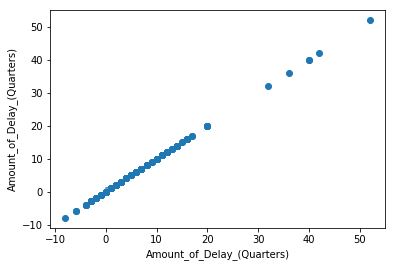

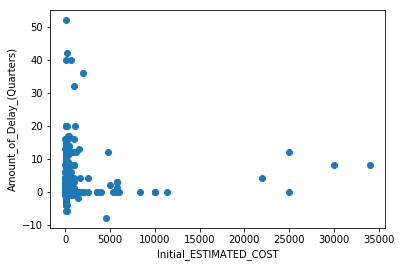

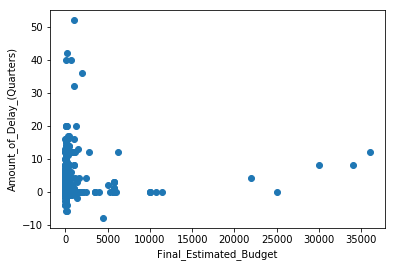

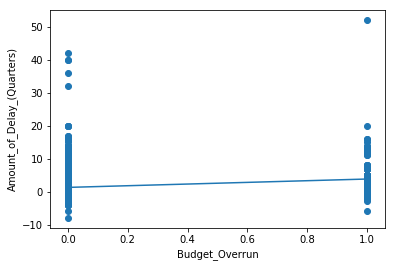

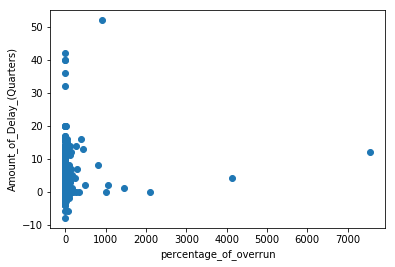

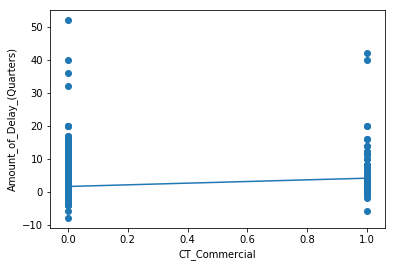

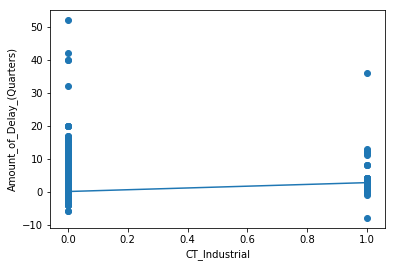

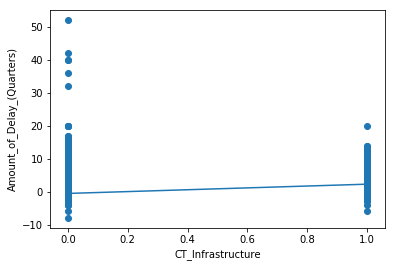

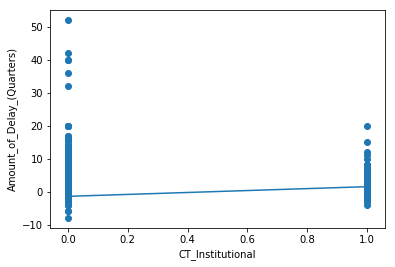

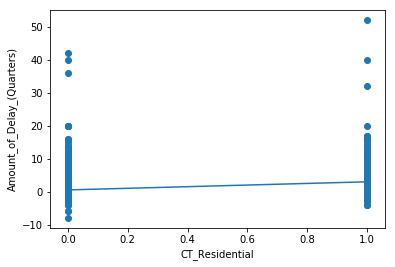

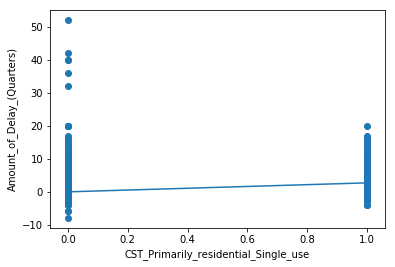

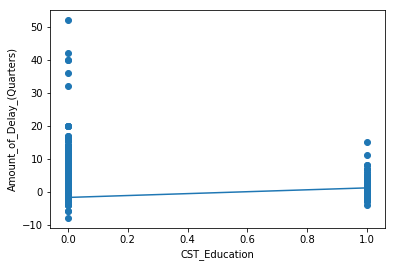

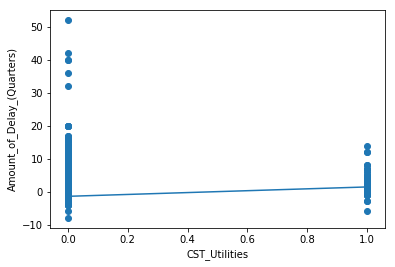

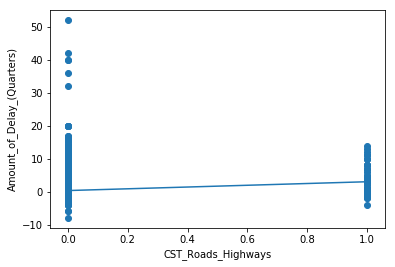

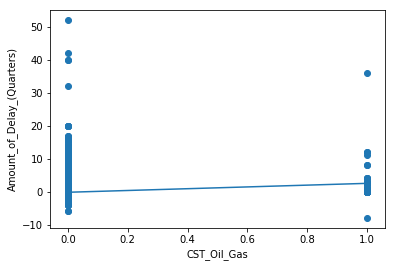

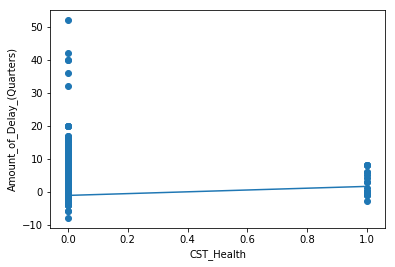

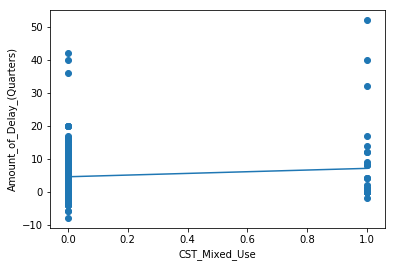

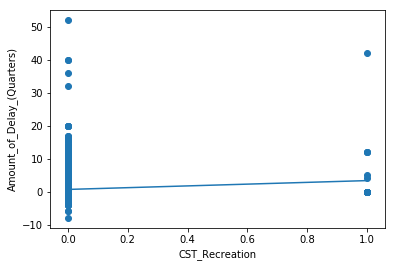

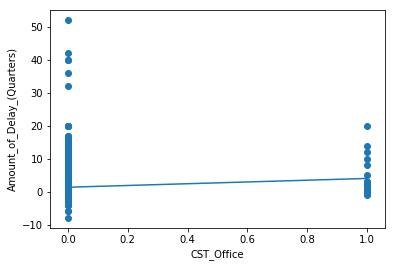

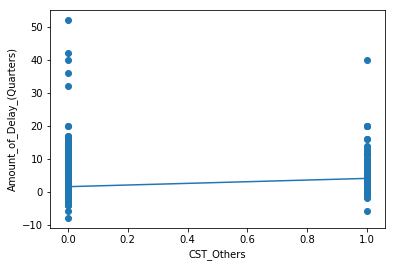

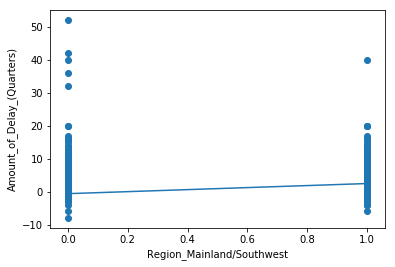

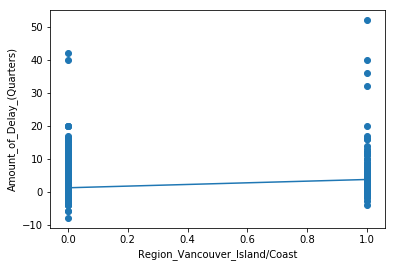

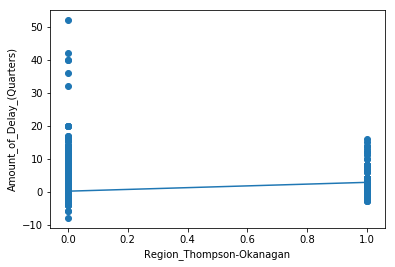

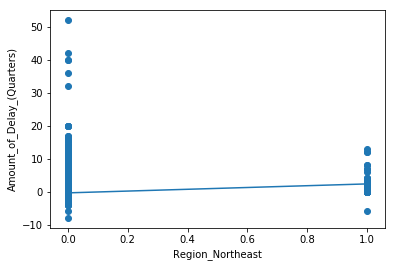

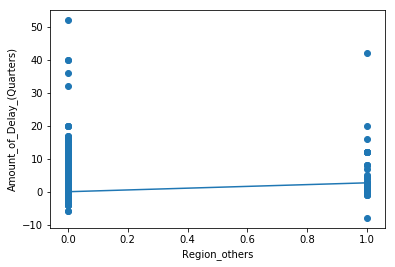

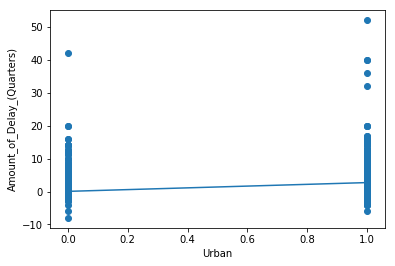

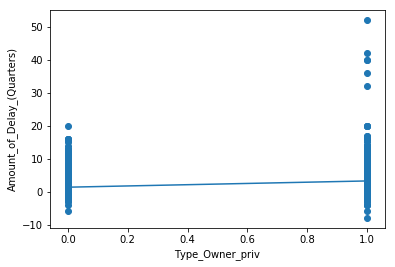

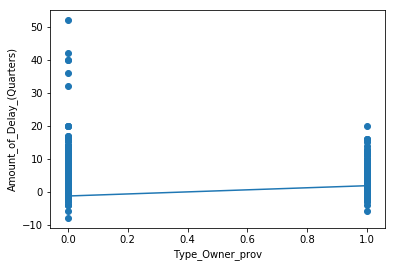

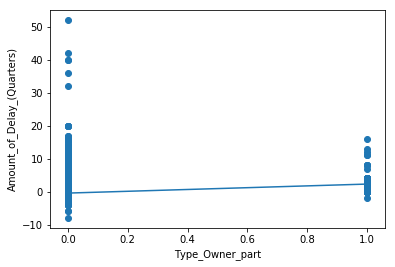

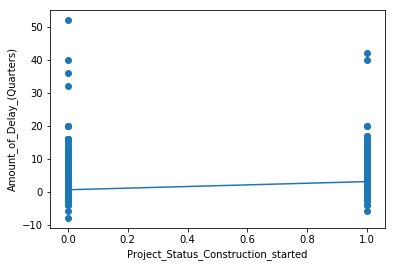

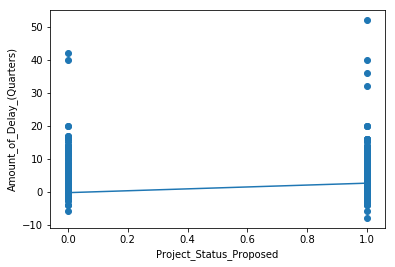

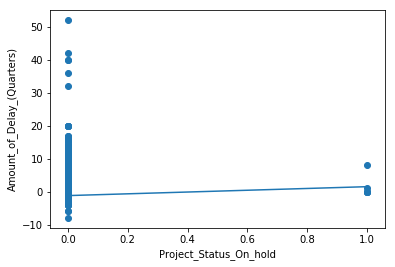

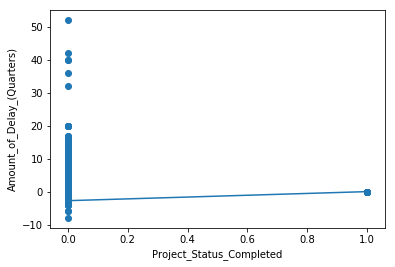

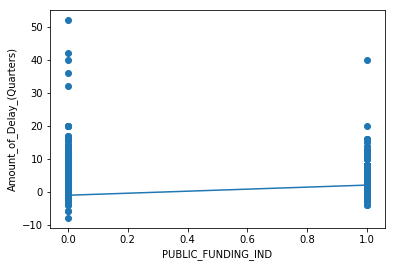

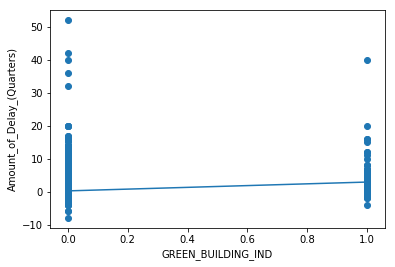

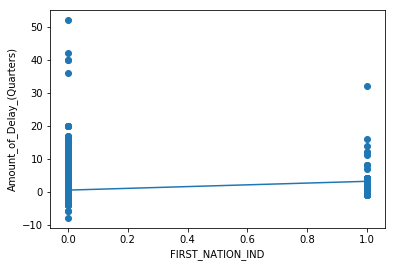

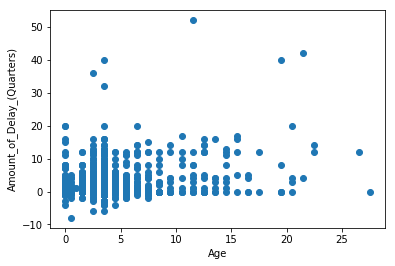

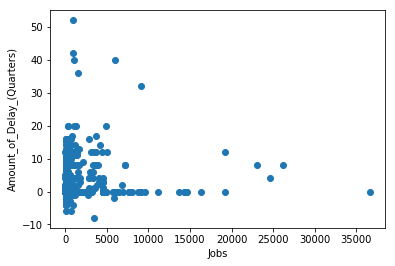

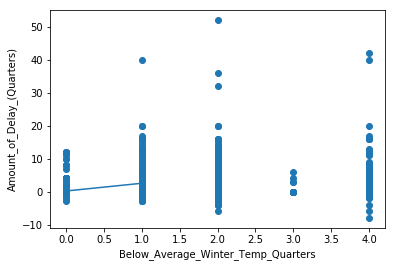

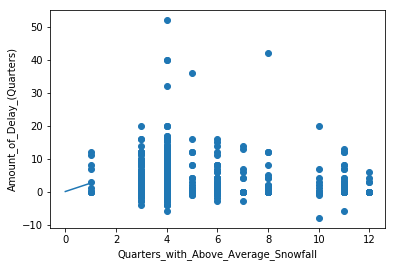

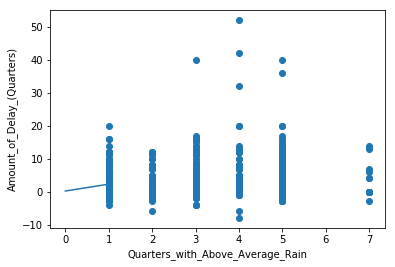

In [13]:
import matplotlib.pyplot as plt
import numpy as np
#plotting the correlation along with the regression line
#looping through each of the numeric columns
for col in cols:
    plt.scatter(df[col],np.array(df['Amount_of_Delay_(Quarters)']))
    plt.xlabel(col)
    plt.ylabel('Amount_of_Delay_(Quarters)')
    results = sm.OLS(np.array(df['Amount_of_Delay_(Quarters)']),sm.add_constant(np.array(df[col]))).fit()
    X_plot = np.linspace(0,1,100)
    plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

    plt.show()
    
    

### Variables chosen for 1st iteration
We have chosen to run the following variables for the first iteration of our regression model. These have the highest correlation - 'CST_Mixed_Use','Type_Owner_priv','PUBLIC_FUNDING_IND','CST_Education','CT_Institutional'

Note - We excluded Age because of colinearity issues

In [14]:
X = df[['CST_Mixed_Use','Type_Owner_priv','PUBLIC_FUNDING_IND','CST_Education','CT_Institutional']]
X.head()

,CST_Mixed_Use,Type_Owner_priv,PUBLIC_FUNDING_IND,CST_Education,CT_Institutional
0,0,0,0,0,0
1,0,0,1,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [15]:
## Without a constant



#Applying Stats model 

y = df["Amount_of_Delay_(Quarters)"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Amount_of_Delay_(Quarters)   R-squared:                       0.242
Model:                                    OLS   Adj. R-squared:                  0.238
Method:                         Least Squares   F-statistic:                     61.17
Date:                        Fri, 17 Jan 2020   Prob (F-statistic):           2.20e-55
Time:                                02:10:53   Log-Likelihood:                -2915.6
No. Observations:                         963   AIC:                             5841.
Df Residuals:                             958   BIC:                             5866.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
CST_Mixed_Use          4.2324      0.905      4.675      0.000       2.456       6.009
Type_Owner_priv        2.9765      0.213     13.956      0.000       2.558       3.395
PUBLIC_FUNDING_IND     1.8820      0.365      5.161      0.000       1.166       2.598
CST_Education         -0.7457      0.854     -0.873      0.383      -2.421       0.930
CT_Institutional       0.0808      0.797      0.101      0.919      -1.483       1.645
==============================================================================
Omnibus:                      687.133   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13113.452
Skew:                           3.047   Prob(JB):                         0.00
Kurtosis:                      20.020   Cond. No.                         5.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We notice that two of the variables have high P-values. Thus we need to remove them because keeping them in the model means are model is not statistically significant, which implies that we cannot reject the null hypothesis that the variables were indeed by chance correlated with the main target

In [16]:
X = df[['CST_Mixed_Use','Type_Owner_priv','PUBLIC_FUNDING_IND']]
X.head()

,CST_Mixed_Use,Type_Owner_priv,PUBLIC_FUNDING_IND
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [17]:
#re-applying the model
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Amount_of_Delay_(Quarters)   R-squared:                       0.241
Model:                                    OLS   Adj. R-squared:                  0.238
Method:                         Least Squares   F-statistic:                     101.5
Date:                        Fri, 17 Jan 2020   Prob (F-statistic):           4.46e-57
Time:                                02:11:02   Log-Likelihood:                -2916.4
No. Observations:                         963   AIC:                             5839.
Df Residuals:                             960   BIC:                             5853.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
CST_Mixed_Use          4.2709      0.904      4.727      0.000       2.498       6.044
Type_Owner_priv        2.9810      0.213     13.985      0.000       2.563       3.399
PUBLIC_FUNDING_IND     1.6891      0.274      6.163      0.000       1.151       2.227
==============================================================================
Omnibus:                      687.664   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13079.574
Skew:                           3.052   Prob(JB):                         0.00
Kurtosis:                      19.991   Cond. No.                         4.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2 - 
### Finding Correlations between Target Variable and Predictor Variables

We will use the value of these correlations to find target variables. Ideally higher correlations mean high predictive power. Using the columns which have the highest correlations, we will apply linear regression

In [18]:
Corr_Matrix_2 = pd.DataFrame(df.drop(['Budget_Overrun','PROJECT_ID','Final_Estimated_Budget'], axis=1).corr(method ='pearson')['percentage_of_overrun'])
Corr_Matrix_2 = Corr_Matrix_2.reindex(Corr_Matrix_2['percentage_of_overrun'].abs().sort_values(ascending=False).index)
print(Corr_Matrix_2)

                                      percentage_of_overrun
percentage_of_overrun                              1.000000
Region_others                                      0.094252
CST_Roads_Highways                                 0.090853
Amount_of_Delay_(Quarters)                         0.089947
Type_Owner_prov                                    0.072473
Times_Delayed                                      0.072357
CST_Primarily_residential_Single_use              -0.062754
CT_Residential                                    -0.060656
Type_Owner_priv                                   -0.059585
PUBLIC_FUNDING_IND                                 0.057864
Project_Status_Proposed                            0.054372
Delayed                                            0.054055
Project_Status_Construction_started               -0.050207
CT_Infrastructure                                  0.046713
Urban                                             -0.044747
Region_Mainland/Southwest               

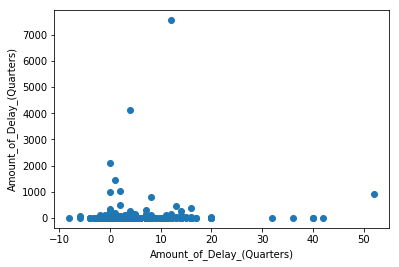

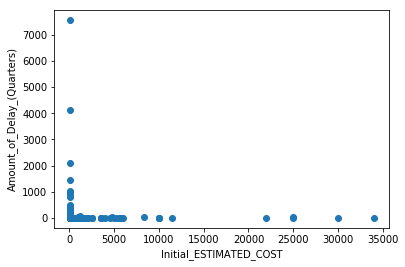

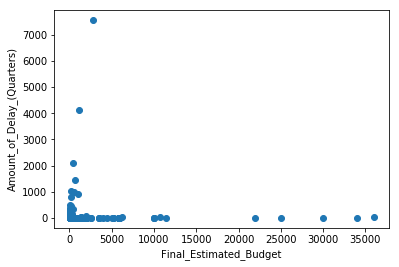

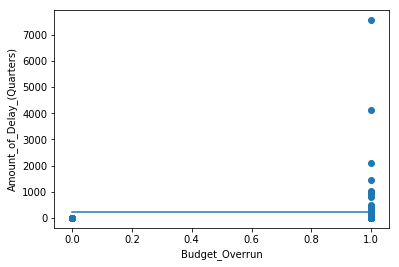

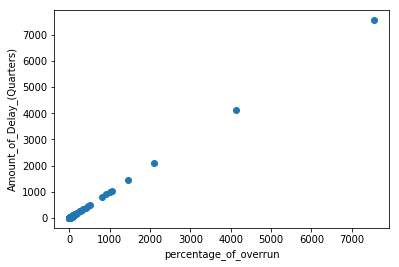

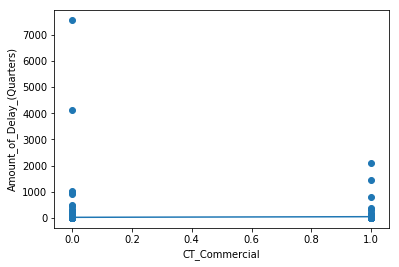

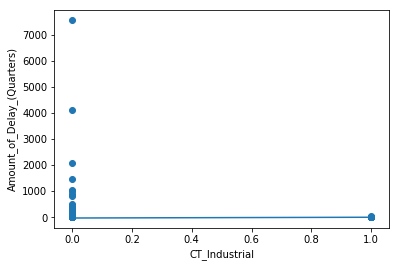

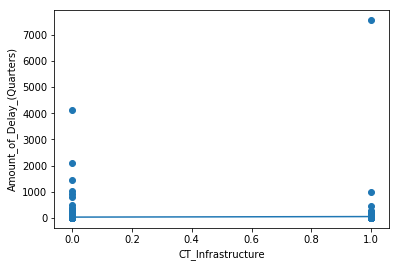

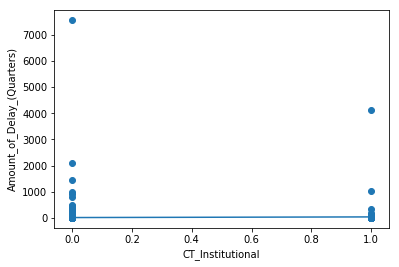

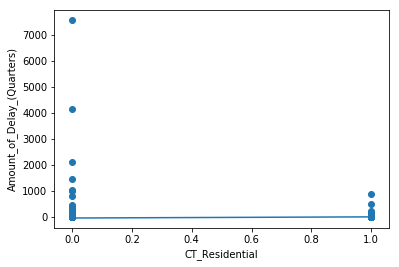

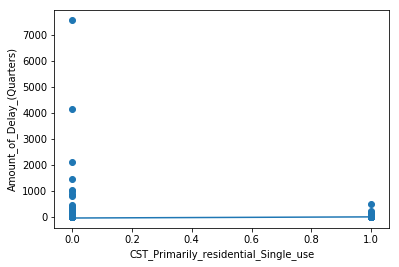

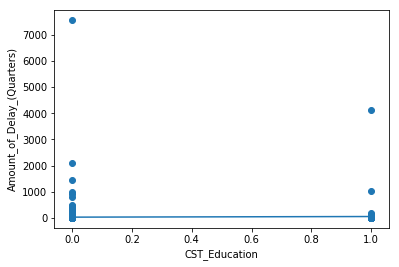

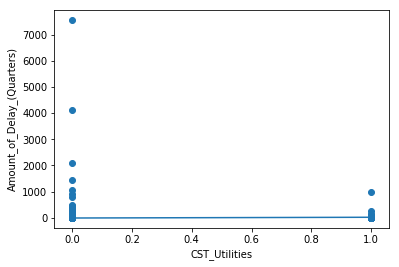

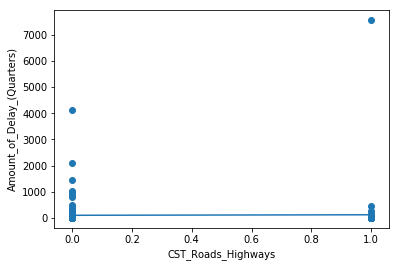

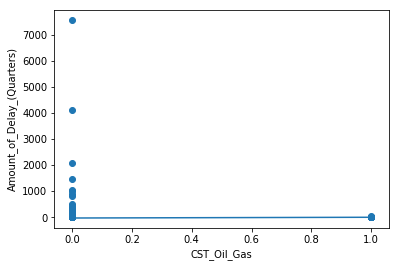

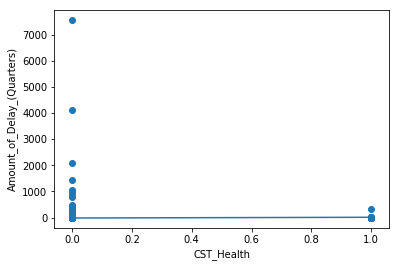

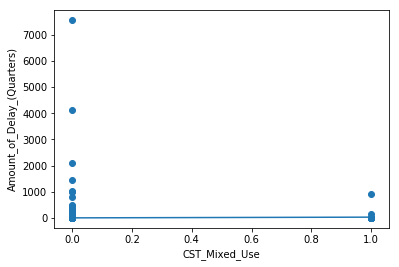

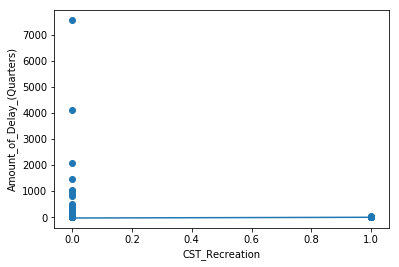

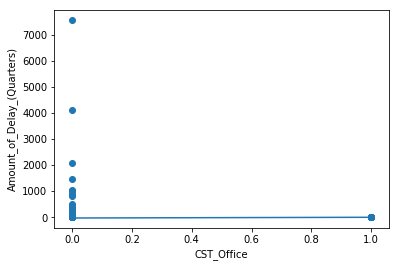

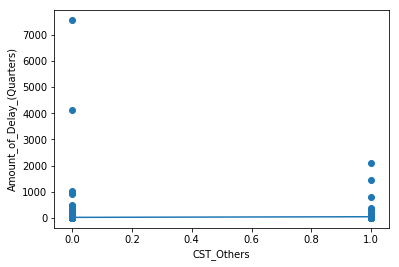

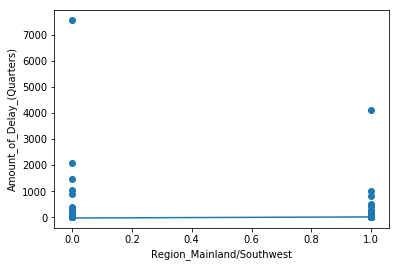

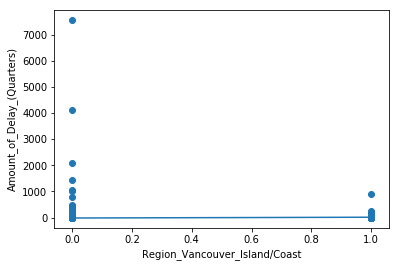

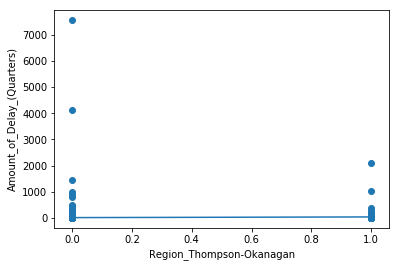

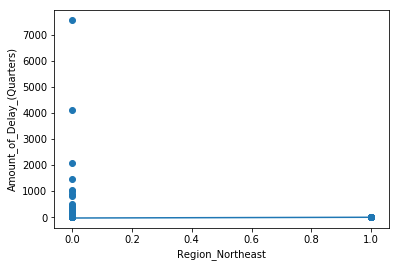

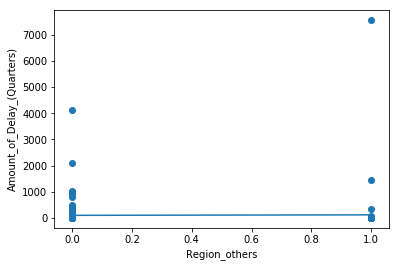

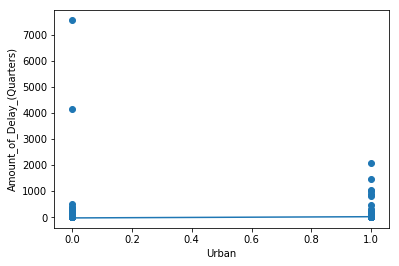

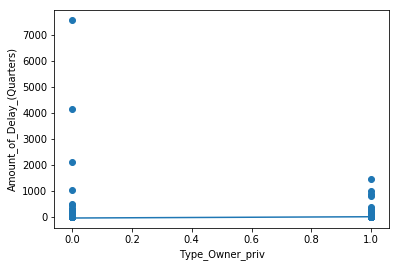

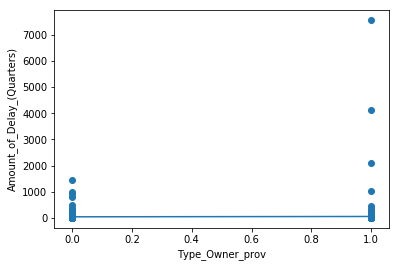

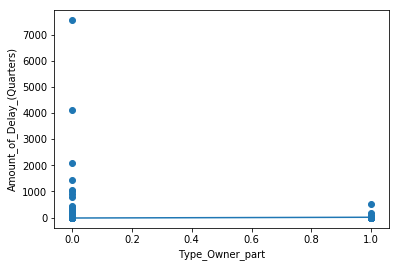

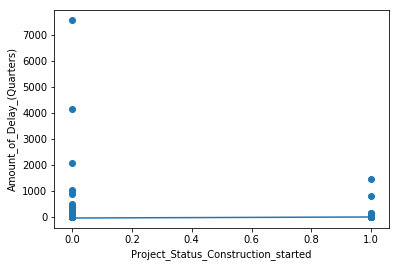

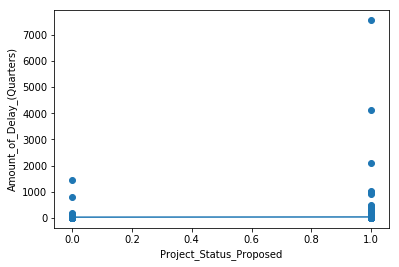

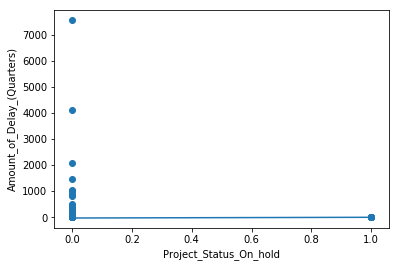

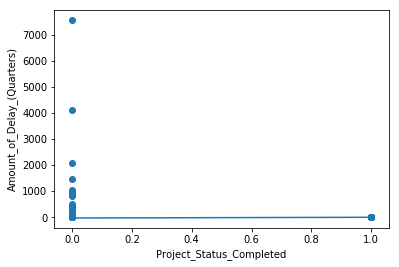

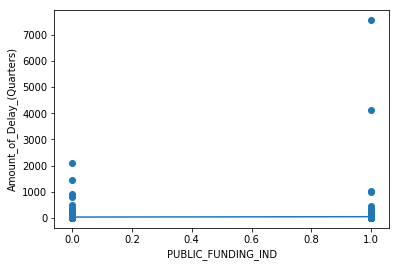

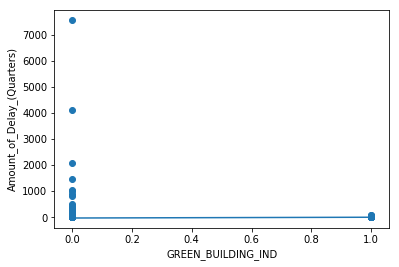

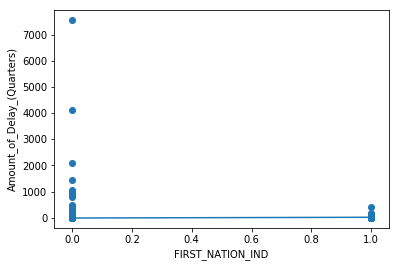

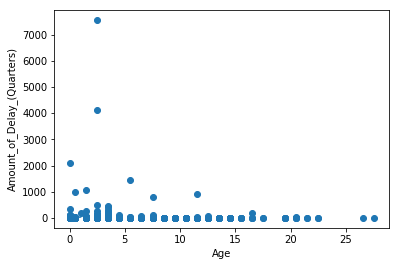

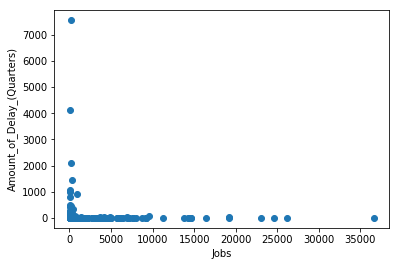

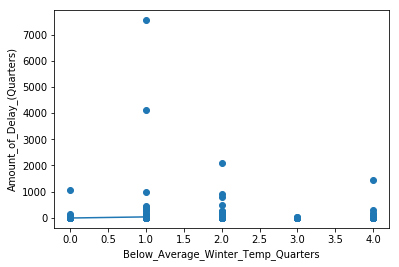

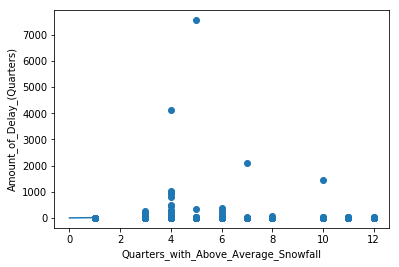

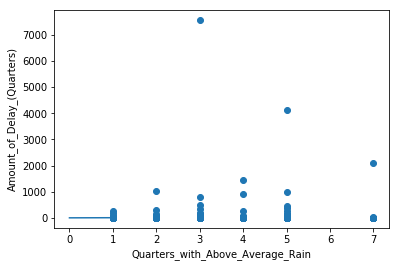

In [19]:
import matplotlib.pyplot as plt
import numpy as np
#plotting the correlation along with the regression line
#looping through each of the numeric columns
for col in cols:
    plt.scatter(df[col],np.array(df['percentage_of_overrun']))
    plt.xlabel(col)
    plt.ylabel('Amount_of_Delay_(Quarters)')
    results = sm.OLS(np.array(df['percentage_of_overrun']),sm.add_constant(np.array(df[col]))).fit()
    X_plot = np.linspace(0,1,100)
    plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

    plt.show()

Correlation values in all the cases are very low. To fit the model we will use the top 5 correlated columns as predictor variables

In [20]:
X2 = df[['Region_others','CST_Roads_Highways','Amount_of_Delay_(Quarters)','Type_Owner_prov','Times_Delayed']]
X2.head()

,Region_others,CST_Roads_Highways,Amount_of_Delay_(Quarters),Type_Owner_prov,Times_Delayed
0,0,0,0,1,0
1,0,0,20,1,3
2,0,0,5,0,2
3,0,0,0,0,0
4,0,0,0,1,0


In [21]:
y2 = df["percentage_of_overrun"]

# Note the difference in argument order
model2 = sm.OLS(y2, X2).fit()
predictions = model2.predict(X2) # make the predictions by the model

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     percentage_of_overrun   R-squared:                       0.035
Model:                               OLS   Adj. R-squared:                  0.030
Method:                    Least Squares   F-statistic:                     6.918
Date:                   Fri, 17 Jan 2020   Prob (F-statistic):           2.35e-06
Time:                           02:11:24   Log-Likelihood:                -6835.7
No. Observations:                    963   AIC:                         1.368e+04
Df Residuals:                        958   BIC:                         1.371e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Region_others                 87.6118     33.906      2.584      0.010      21.074     154.150
CST_Roads_Highways            73.7624     38.061      1.938      0.053      -0.930     148.455
Amount_of_Delay_(Quarters)     4.1458      2.194      1.890      0.059      -0.160       8.451
Type_Owner_prov               26.2114     18.901      1.387      0.166     -10.880      63.303
Times_Delayed                  3.9467      8.791      0.449      0.654     -13.304      21.198
==============================================================================
Omnibus:                     2165.563   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7967621.528
Skew:                          19.598   Prob(JB):                         0.00
Kurtosis:                     446.885   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We remove the variables which have high p values or low statistical significance

In [22]:
X2 = df[['Region_others','CST_Roads_Highways']]
X2.head()

,Region_others,CST_Roads_Highways
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [23]:
model2 = sm.OLS(y2, X2).fit()
predictions = model2.predict(X2) # make the predictions by the model

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     percentage_of_overrun   R-squared:                       0.023
Model:                               OLS   Adj. R-squared:                  0.021
Method:                    Least Squares   F-statistic:                     11.29
Date:                   Fri, 17 Jan 2020   Prob (F-statistic):           1.42e-05
Time:                           02:11:32   Log-Likelihood:                -6841.6
No. Observations:                    963   AIC:                         1.369e+04
Df Residuals:                        961   BIC:                         1.370e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Region_others        107.2531     33.481      3.203      0.001      41.549     172.957
CST_Roads_Highways   108.3863     35.568      3.047      0.002      38.586     178.186
==============================================================================
Omnibus:                     2157.274   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7752775.394
Skew:                          19.427   Prob(JB):                         0.00
Kurtosis:                     440.842   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Needless to say the values of this model in terms of accuracy are very poor. 